In [2420]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt


data = pd.read_csv('final_data.csv')

In [2421]:
data

,Unnamed: 0,date,avg_temp,co2,num_natural_disasters,sea_ice_extent
0,0,3/9/14,6.378,398.87,391,4.285
1,1,8/5/89,14.135,352.54,172,16.916
2,2,7/27/85,13.973,345.83,268,16.181
3,3,6/21/92,13.576,358.17,395,13.200
4,4,12/10/99,4.565,368.06,554,12.357
...,...,...,...,...,...,...
2200,2200,1/30/03,3.981,374.85,764,4.336
2201,2201,11/6/04,7.315,375.19,308,17.167
2202,2202,10/16/02,9.988,371.34,881,18.043
2203,2203,10/8/81,9.394,336.36,131,18.701


In [2422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 6 columns):
Unnamed: 0               2205 non-null int64
date                     2205 non-null object
avg_temp                 2205 non-null float64
co2                      2205 non-null float64
num_natural_disasters    2205 non-null int64
sea_ice_extent           2205 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 103.5+ KB


In [2423]:
data['date'] = pd.to_datetime(data['date']) 
data['date']=data['date'].map(dt.datetime.toordinal)

In [2424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 6 columns):
Unnamed: 0               2205 non-null int64
date                     2205 non-null int64
avg_temp                 2205 non-null float64
co2                      2205 non-null float64
num_natural_disasters    2205 non-null int64
sea_ice_extent           2205 non-null float64
dtypes: float64(3), int64(3)
memory usage: 103.5 KB


In [2425]:
data

,Unnamed: 0,date,avg_temp,co2,num_natural_disasters,sea_ice_extent
0,0,735301,6.378,398.87,391,4.285
1,1,726319,14.135,352.54,172,16.916
2,2,724849,13.973,345.83,268,16.181
3,3,727370,13.576,358.17,395,13.200
4,4,730098,4.565,368.06,554,12.357
...,...,...,...,...,...,...
2200,2200,731245,3.981,374.85,764,4.336
2201,2201,731891,7.315,375.19,308,17.167
2202,2202,731139,9.988,371.34,881,18.043
2203,2203,723461,9.394,336.36,131,18.701


In [2426]:

data.describe()

,Unnamed: 0,date,avg_temp,co2,num_natural_disasters,sea_ice_extent
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,730142.425850,9.093069,370.581837,452.292517,11.610827
std,636.672993,3720.339569,4.130893,18.282012,231.389085,5.584291
min,0.000000,722397.000000,2.558000,333.400000,21.000000,2.281000
25%,551.000000,727107.000000,4.724000,355.430000,257.000000,6.089000
50%,1102.000000,730463.000000,9.313000,369.940000,465.000000,12.339000
75%,1653.000000,733388.000000,12.930000,386.280000,624.000000,17.167000
max,2204.000000,735960.000000,15.482000,404.510000,911.000000,19.978000


In [2427]:
data = data.iloc[: , 1:]

In [2428]:
data

,date,avg_temp,co2,num_natural_disasters,sea_ice_extent
0,735301,6.378,398.87,391,4.285
1,726319,14.135,352.54,172,16.916
2,724849,13.973,345.83,268,16.181
3,727370,13.576,358.17,395,13.200
4,730098,4.565,368.06,554,12.357
...,...,...,...,...,...
2200,731245,3.981,374.85,764,4.336
2201,731891,7.315,375.19,308,17.167
2202,731139,9.988,371.34,881,18.043
2203,723461,9.394,336.36,131,18.701


In [2429]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2430]:
def MAPE(y_actual,y_Predicted):
    mape = np.mean(np.abs((y_actual - y_Predicted)/y_actual))*100
    return mape

In [2431]:
new_data = data.values
X, y = new_data[:, :-1], new_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

cv = RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

lasso_model = LassoCV(alphas = arange(0, 1, 0.001), cv = cv, n_jobs = -1, normalize = True)
lasso = lasso_model.fit(X_train, y_train)
lasso_predict = lasso.predict(X_test)
Lasso_MAPE = MAPE(y_test, lasso_predict)
print("MAPE value: ",Lasso_MAPE)
Accuracy = 100 - Lasso_MAPE
print('Accuracy of Lasso Regression: {:0.2f}%.'.format(Accuracy))
print('Best Alpha: %f' % lasso.alpha_)
print('Coefficients:')
pd.Series(lasso.coef_, index = data.iloc[:, :-1].columns)

/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6488.95683165588, tolerance: 4.677890910799933
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6409.664708596138, tolerance: 4.659064715771976
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

MAPE value:  27.50228033378236
Accuracy of Lasso Regression: 72.50%.
Best Alpha: 0.000000
Coefficients:


/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6358.418505704598, tolerance: 4.6689399650676755
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/estheranemeje/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

date                     0.005444
avg_temp                 0.958163
co2                     -1.088449
num_natural_disasters   -0.002879
dtype: float64

In [2432]:
print('R squared training set', round(lasso.score(X_train, y_train), 5))
print('R squared test set', round(lasso.score(X_test, y_test), 5))

mean_squared_error(y_test, lasso_predict)

R squared training set 0.72662
R squared test set 0.71475


8.677930341545936

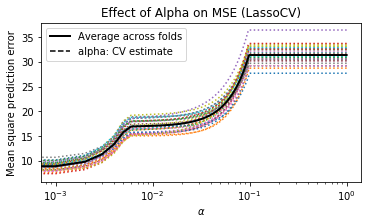

In [2433]:
plt.figure(figsize=(5, 3), constrained_layout=True)
plt.semilogx(lasso.alphas_, lasso.mse_path_, ':')
plt.semilogx(lasso.alphas_, lasso.mse_path_.mean(axis=-1), 'k',
             label='Average across folds', linewidth=2)
plt.axvline(lasso.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square prediction error')
plt.title('Effect of Alpha on MSE (LassoCV)')
plt.show(block=False)